<a href="https://colab.research.google.com/github/yeahAaron/KaggleProject/blob/main/BigDataDerby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal of this Competition
The goal of this competition is to analyze horse racing tactics, drafting strategies, and path efficiency.

## Context
In this competition, you will create a model to interpret one aspect of this new data accessing X/Y coordinate mapping of horses during races. Using the data, you might analyze jockey decision making, compare race surfaces, or measure the relative importance of drafting. With considerable data, contestants can flex their creativity problem solving skills.

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

data_race = pd.read_csv("nyra_race_table.csv")

In [ ]:
ls -lh

total 1908680
-rw-r--r--  1 arobsan99  staff   151K Dec 11 21:37 BigDataDerby.ipynb
-rw-r--r--  1 arobsan99  staff   610M Nov 15 01:00 nyra_2019_complete.csv
-rw-r--r--  1 arobsan99  staff    93K Nov 12 15:42 nyra_race_table.csv
-rw-r--r--  1 arobsan99  staff   722K Nov 12 15:43 nyra_start_table.csv
-rw-r--r--  1 arobsan99  staff   321M Nov 12 15:44 nyra_tracking_table.csv


`track_id` - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.

`race_date` - date the race took place. YYYY-MM-DD.

`race_number` - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.

`distance_id` - Distance of the race in furlongs passed as an integer. Example - 600 would be 6 furlongs.

`course_type` - The course the race was run over passed as one character. M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf.

`track_condition` - The condition of the course the race was run on passed as three characters. YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft.

`run_up_distance` - Distance in feet of the gate to the start of the race passed as an integer.

`race_type` - The classification of the race passed as as five characters. STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight.

`purse` - Purse in US dollars of the race passed as an money with two decimal places.

`post_time` - Time of day the race began passed as 5 character. Example - 01220 would be 12:20.

In [ ]:
data_race

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220
...,...,...,...,...,...,...,...,...,...,...
1995,SAR,2019-09-02,7,900,D,SY,79,CLM,48000,356
1996,SAR,2019-09-02,8,700,D,SY,32,AOC,83000,433
1997,SAR,2019-09-02,9,850,I,SF,22,STK,250000,507
1998,SAR,2019-09-02,10,700,D,SY,32,STK,350000,540


In [ ]:
data_race['distance_id']

0       650
1       600
2       550
3       900
4       700
       ... 
1995    900
1996    700
1997    850
1998    700
1999    700
Name: distance_id, Length: 2000, dtype: int64

(array([696., 438., 789.,  35.,  31.,   0.,   1.,   6.,   1.,   3.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <BarContainer object of 10 artists>)

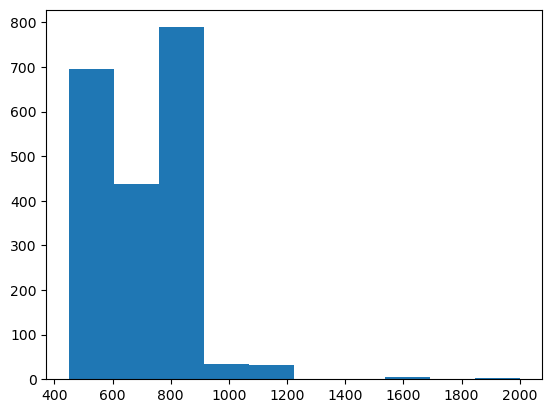

In [ ]:
plt.hist(data_race['distance_id'])

In [ ]:
data_start = pd.read_csv("nyra_start_table.csv")

`track_id` - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.

`race_date` - date the race took place. YYYY-MM-DD.

`race_number` - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.

`program_number` - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.

`weight_carried` - An integer of the weight carried by the horse in the race.

`jockey` - Name of the jockey on the horse in the race. 50 character max.

`odds` - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.

`position_at_finish` - An integer of the horse's finishing position. (added to the dataset 9/8/22)

In [ ]:
data_start

,AQU,2019-01-01,1,1,123,Dylan Davis,130,2
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2
...,...,...,...,...,...,...,...,...
14909,SAR,2019-09-02,11,3,119,Manuel Franco,1470,2
14910,SAR,2019-09-02,11,4,119,Jose Lezcano,1070,5
14911,SAR,2019-09-02,11,6,119,Eric Cancel,1130,10
14912,SAR,2019-09-02,11,7,119,Irad Ortiz Jr.,460,7


In [ ]:
data_tracking = pd.read_csv("nyra_tracking_table.csv")

`track_id` - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.

`race_date` - date the race took place. YYYY-MM-DD.

`race_number` - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.

`program_number` - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.

`trakus_index` - The common collection of point of the lat / long of the horse in the race passed as an integer. From what we can tell, it's collected every 0.25 seconds.

`latitude` - The latitude of the horse in the race passed as a float.

`longitude` - The longitude of the horse in the race passed as a float.

In [ ]:
data_tracking

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762
...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,167,40.672363,-73.830853
5228426,AQU,2019-11-23,9,2,168,40.672321,-73.830873
5228427,AQU,2019-11-23,9,2,169,40.672281,-73.830893
5228428,AQU,2019-11-23,9,2,170,40.672240,-73.830913


In [ ]:
data_complete = pd.read_csv("nyra_2019_complete.csv")

/var/folders/8n/shghzqy97kv7y_34yg15mq680000gn/T/ipykernel_39487/2932113421.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_complete = pd.read_csv("nyra_2019_complete.csv")


`track_id` - char(3)

`race_date` - date

`race_number` - char(3)

`program_number` - char(3)

`trakus_index` - int

`latitude` - float

`longitude` - float

`distance_id` - int

`course_type` - char(1)

`track_condition` - char(3)

`run_up_distance` - int

`race_type` - char(5)

`post_time` - char(5)

`weight_carried` - int

`jockey` - char(50)

`odds` - int

`position_at_finish` - An integer of the horse's finishing position.

In [ ]:
data_complete

,AQU,2019-01-01,9,6,72,40.6729017197787,-73.8276065972899,600,D,GD,48,CLM,25000.00,00420,120,Andre Shivnarine Worrie,2090,8
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228424,AQU,2019-11-23,9,2,167,40.672363,-73.830853,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228425,AQU,2019-11-23,9,2,168,40.672321,-73.830873,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228426,AQU,2019-11-23,9,2,169,40.672281,-73.830893,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228427,AQU,2019-11-23,9,2,170,40.672240,-73.830913,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9


In [ ]:
data_complete.rename(columns={data_complete.columns[0]: "track_id"}, inplace=True)
data_complete.rename(columns={data_complete.columns[1]: "race_date"}, inplace=True)
data_complete.rename(columns={data_complete.columns[2]: "race_number"}, inplace=True)
data_complete.rename(columns={data_complete.columns[3]: "program_number"}, inplace=True)
data_complete.rename(columns={data_complete.columns[4]: "trakus_index"}, inplace=True)
data_complete.rename(columns={data_complete.columns[5]: "latitude"}, inplace=True)
data_complete.rename(columns={data_complete.columns[6]: "longitude"}, inplace=True)
data_complete.rename(columns={data_complete.columns[7]: "distance_id"}, inplace=True)
data_complete.rename(columns={data_complete.columns[8]: "course_type"}, inplace=True)
data_complete.rename(columns={data_complete.columns[9]: "track_condition"}, inplace=True)
data_complete.rename(columns={data_complete.columns[10]: "run_up_distance"}, inplace=True)
data_complete.rename(columns={data_complete.columns[11]: "race_type"}, inplace=True)
data_complete.rename(columns={data_complete.columns[12]: "purse"}, inplace=True)
data_complete.rename(columns={data_complete.columns[13]: "odds"}, inplace=True)
data_complete.rename(columns={data_complete.columns[14]: "weight_carried"}, inplace=True)
data_complete.rename(columns={data_complete.columns[15]: "jockey"}, inplace=True)
data_complete.rename(columns={data_complete.columns[16]: "post_time"}, inplace=True)
data_complete.rename(columns={data_complete.columns[17]: "position_at_finish"}, inplace=True)

In [ ]:
data_complete

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,odds,weight_carried,jockey,post_time,position_at_finish
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228424,AQU,2019-11-23,9,2,167,40.672363,-73.830853,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228425,AQU,2019-11-23,9,2,168,40.672321,-73.830873,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228426,AQU,2019-11-23,9,2,169,40.672281,-73.830893,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228427,AQU,2019-11-23,9,2,170,40.672240,-73.830913,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9


In [ ]:
data_Belmont = data_complete[~data_complete['track_id'].str.startswith('AQU', 'SAR')]
data_Belmont

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,odds,weight_carried,jockey,post_time,position_at_finish
571,BEL,2019-05-25,10,9,1,40.715902,-73.720118,600,I,FM,90,AOC,85000.0,624,121,Dylan Davis,2525,9
572,BEL,2019-05-25,10,9,2,40.715908,-73.720140,600,I,FM,90,AOC,85000.0,624,121,Dylan Davis,2525,9
573,BEL,2019-05-25,10,9,3,40.715915,-73.720166,600,I,FM,90,AOC,85000.0,624,121,Dylan Davis,2525,9
574,BEL,2019-05-25,10,9,4,40.715922,-73.720193,600,I,FM,90,AOC,85000.0,624,121,Dylan Davis,2525,9
575,BEL,2019-05-25,10,9,5,40.715931,-73.720227,600,I,FM,90,AOC,85000.0,624,121,Dylan Davis,2525,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227886,BEL,2019-09-07,10,4,8,40.714341,-73.725959,1200,T,GD,63,STK,1000000.0,547,122,Tony Piccone,3825,2
5227887,BEL,2019-09-07,10,4,9,40.714332,-73.725925,1200,T,GD,63,STK,1000000.0,547,122,Tony Piccone,3825,2
5227888,BEL,2019-09-07,10,4,10,40.714324,-73.725891,1200,T,GD,63,STK,1000000.0,547,122,Tony Piccone,3825,2
5227889,BEL,2019-09-07,10,4,11,40.714315,-73.725854,1200,T,GD,63,STK,1000000.0,547,122,Tony Piccone,3825,2


In [ ]:
data_Belmont_update = data_Belmont[data_Belmont['trakus_index'] == 40]

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,odds,weight_carried,jockey,post_time,position_at_finish,lat/long_difference
811,BEL,2019-05-25,10,9,40,40.716394,-73.722097,600,I,FM,90,AOC,85000.0,624,121,Dylan Davis,2525,9,114.438491
1091,BEL,2019-06-09,6,6,40,40.716143,-73.721487,600,I,FM,112,CLM,60000.0,412,123,Manuel Franco,1300,8,114.437630
1344,SAR,2019-07-27,3,6,40,43.070597,-73.767840,550,T,GD,74,CLM,52000.0,210,122,Irad Ortiz Jr.,1210,10,116.838437
3480,BEL,2019-05-24,4,4,40,40.714670,-73.717492,850,T,FM,130,CLM,42000.0,308,117,Joey R. Martinez,1780,4,114.432162
3945,BEL,2019-06-02,8,11,40,40.714649,-73.717473,850,T,FM,170,CLM,39000.0,519,117,Joey R. Martinez,2675,2,114.432122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225777,BEL,2019-09-13,5,1,40,40.715393,-73.718048,800,T,FM,110,ALW,77000.0,508,124,Joel Rosario,100,5,114.433441
5226161,SAR,2019-08-18,4,4,40,43.071761,-73.770839,800,I,GD,162,ALW,92000.0,242,125,Joel Rosario,185,3,116.842600
5226494,BEL,2019-09-06,7,9,40,40.716106,-73.721325,600,I,YL,126,STK,100000.0,612,120,Manuel Franco,990,3,114.437432
5227304,BEL,2019-09-07,10,5,40,40.714000,-73.724405,1200,T,GD,63,STK,1000000.0,547,122,Flavien Prat,1910,3,114.438404


## Data Separation

### Data Preparation as X and y

In [ ]:
y = data_Belmont_update['position_at_finish']
y

811         9
1091        8
1344       10
3480        4
3945        2
           ..
5225777     5
5226161     3
5226494     3
5227304     3
5227858     2
Name: position_at_finish, Length: 8722, dtype: int64

In [ ]:
X = data_Belmont_update[['trakus_index', 'latitude', 'longitude']]
X

,trakus_index,latitude,longitude
811,40,40.716394,-73.722097
1091,40,40.716143,-73.721487
1344,40,43.070597,-73.767840
3480,40,40.714670,-73.717492
3945,40,40.714649,-73.717473
...,...,...,...
5225777,40,40.715393,-73.718048
5226161,40,43.071761,-73.770839
5226494,40,40.716106,-73.721325
5227304,40,40.714000,-73.724405


### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,trakus_index,latitude,longitude
4675281,40,43.072066,-73.770052
3146726,40,40.713594,-73.721520
3740379,40,40.715393,-73.717978
2975732,40,40.715467,-73.718125
4862995,40,40.713714,-73.718042
...,...,...,...
239380,40,40.715439,-73.718046
63935,40,40.713717,-73.718001
4853233,40,43.070633,-73.767758
4284730,40,43.070726,-73.767083


In [ ]:
X_test

,trakus_index,latitude,longitude
3336718,40,40.716095,-73.718901
1682908,40,43.069414,-73.770270
5086994,40,43.071140,-73.766954
485021,40,43.069378,-73.770437
5191951,40,40.713677,-73.718070
...,...,...,...
2449529,40,40.714771,-73.717531
4616727,40,43.071847,-73.771115
1962435,40,40.717126,-73.722753
2596755,40,43.071964,-73.770214


## Model Building

### Linear Regression

**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([4.6250202 , 4.28222266, 4.52921056, ..., 4.78087807, 4.82752824,
       4.14181007])

In [ ]:
y_lr_test_pred

array([4.4666878 , 4.60584526, 4.83705193, ..., 4.20281401, 4.61366297,
       4.46661837])

**Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("LR MSE (Train): ", lr_train_mse)
print("LR R2 (Train): ", lr_train_r2)
print("LR MSE (Test): ", lr_test_mse)
print("LR R2 (Test): ", lr_test_r2)

LR MSE (Train):  6.435040152842848
LR R2 (Train):  0.007072066972094726
LR MSE (Test):  6.554408864185109
LR R2 (Test):  0.0023005558955517813


In [ ]:
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]

In [ ]:
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,6.43504,0.007072,6.554409,0.002301


## Random Forest

**Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

**Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

**Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print("RF MSE (Train): ", rf_train_mse)
print("RF R2 (Train): ", rf_train_r2)
print("RF MSE (Test): ", rf_test_mse)
print("RF R2 (Test): ", rf_test_r2)

RF MSE (Train):  6.343015400108719
RF R2 (Train):  0.021271504015131004
RF MSE (Test):  6.511029670229148
RF R2 (Test):  0.008903652924187044


In [ ]:
rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]

In [ ]:
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,6.343015,0.021272,6.51103,0.008904


### Model Comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,6.43504,0.007072,6.554409,0.002301
0,Random Forest,6.343015,0.021272,6.51103,0.008904


In [ ]:
df_models.reset_index(drop=True)

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,6.43504,0.007072,6.554409,0.002301
1,Random Forest,6.343015,0.021272,6.51103,0.008904


### Data visualization of prediction results

Text(0.5, 0, 'Observed position_at_finish')

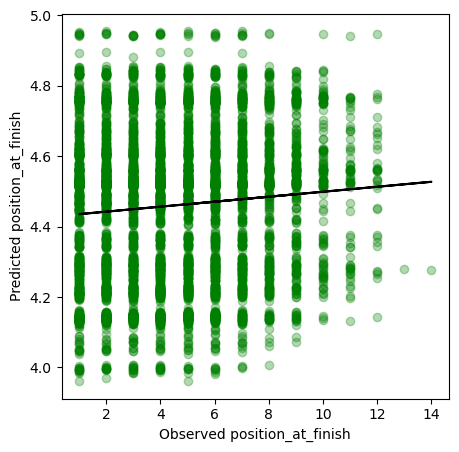

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="green", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), c="black")
plt.ylabel("Predicted position_at_finish")
plt.xlabel("Observed position_at_finish")

## Logistic Regression

**Training the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
lg.fit(X_train, y_train)

/Users/arobsan99/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Applying the model to make a prediction**

In [ ]:
y_lg_train_pred = lg.predict(X_train)
y_lg_test_pred = lg.predict(X_test)

In [ ]:
y_lg_train_pred

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
y_lg_test_pred

array([3, 3, 3, ..., 3, 3, 3])

**Evaluate model performance**

In [ ]:
accuracy = accuracy_score(y_test, y_lg_test_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.12320916905444126


**Ranking system**

In [ ]:
X['Predicted_Probability'] = lg.predict_proba(X[['trakus_index', 'latitude', 'longitude']])[:, 1]

X_sorted = X.sort_values(by='Predicted_Probability', ascending=False)
X_sorted['Predicted_Rank'] = range(1, len(X_sorted) + 1)

/var/folders/8n/shghzqy97kv7y_34yg15mq680000gn/T/ipykernel_39487/3246853833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Predicted_Probability'] = lg.predict_proba(X[['trakus_index', 'latitude', 'longitude']])[:, 1]


In [ ]:
print("\nDataFrame with Predicted Ranking:")
print(X_sorted[['trakus_index', 'latitude', 'longitude', 'Predicted_Rank']])


DataFrame with Predicted Ranking:
         trakus_index   latitude  longitude  Predicted_Rank
3522065            40  40.713992 -73.724472               1
5123517            40  40.713966 -73.724407               2
3280053            40  40.713991 -73.724426               3
5227858            40  40.714008 -73.724459               4
3045409            40  40.713976 -73.724372               5
...               ...        ...        ...             ...
2176834            40  43.071950 -73.765283            8718
494455             40  43.071997 -73.765261            8719
840456             40  43.072015 -73.765268            8720
1327556            40  43.072011 -73.765253            8721
919674             40  43.072013 -73.765217            8722

[8722 rows x 4 columns]
